<div style="text-align: center; background-color: #4CAF50; padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Mushroom Classification model </span>
</div>

**Mushroom Classification**
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

import libraries


In [3]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score ,f1_score , classification_report , confusion_matrix ,precision_score ,recall_score ,roc_auc_score , roc_curve , auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree , export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import joblib
import time

# **Data Collection**
- Collect data from Kaggle datasets.
- load data from csv file.
  

In [4]:
df =pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.shape

(8124, 23)

# **Data Cleaning and Preprocessing** 
- Handling missing values.
- Handiling types.
- Handling imbalanced data.
- Handling duplicate data.
- Handling outliers.  

 check missing values

In [8]:
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Check duplicated

In [9]:
print(df.duplicated().sum())

0


check types

In [10]:
print(df.dtypes)


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


check balanced

In [11]:
df['class'].value_counts(normalize=True)

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64

Check uniqe

In [12]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


# **Data Exploration (EDA)**
- Descriptive statistics.
- Visualizations.
- Correlation analysis.
- Understand data distribution and patterns.
- Identify outliers and potential feature correlations.

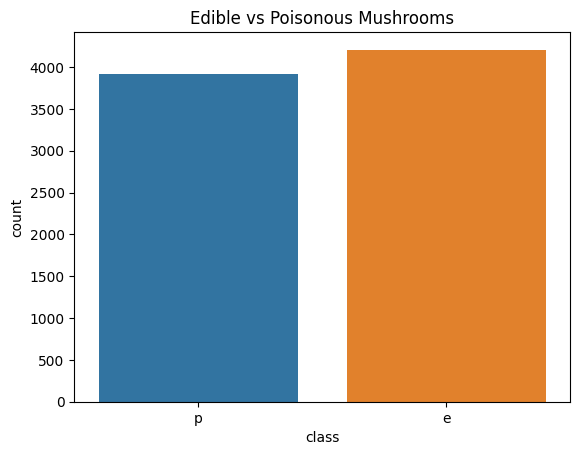

In [13]:
sns.countplot(x='class', data=df)
plt.title('Edible vs Poisonous Mushrooms')
plt.show()

In [14]:
cols = df.columns[1:]  # skip 'class'
n_cols = 4
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for idx, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=col, hue="class", data=df, palette="Set2")
    plt.title(f"{col} vs Class")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Feature Distributions vs Class", fontsize=20, y=1.02)
plt.show()

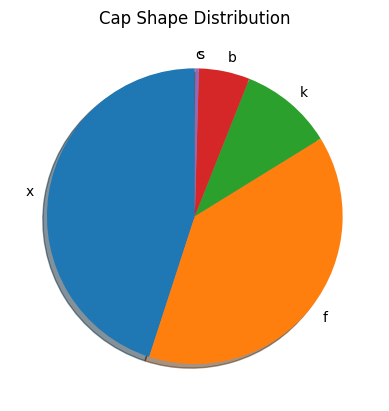

In [15]:
df["cap-shape"].value_counts().plot.pie( shadow=True, startangle=90)
plt.title("Cap Shape Distribution")
plt.ylabel("")
plt.show()


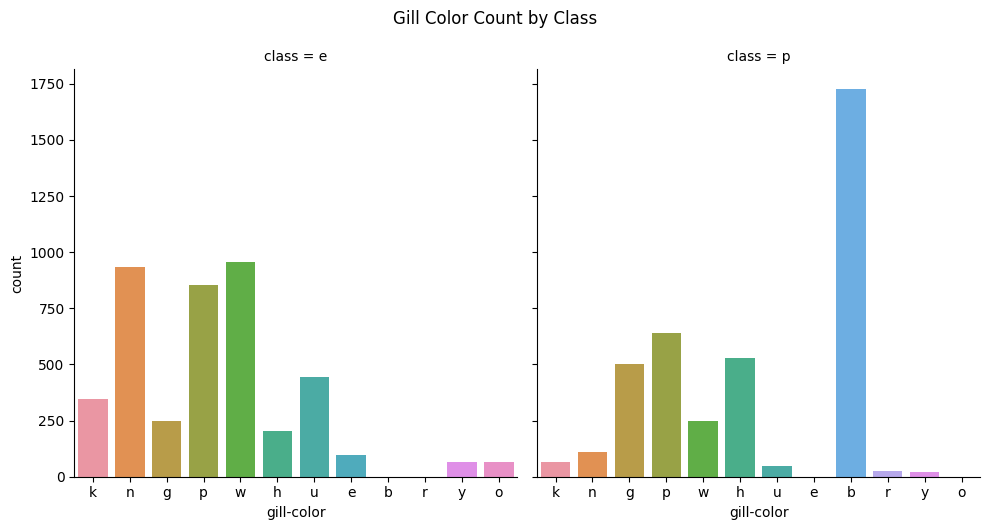

In [16]:
g = sns.catplot(x="gill-color", col="class", kind="count", data=df, col_order=["e", "p"])
g.fig.suptitle("Gill Color Count by Class", y=1.05)
plt.show()


In [17]:
pd.crosstab(df['odor'], df['class'], normalize='index')


class,e,p
odor,,
a,1.000000,0.000000
c,0.000000,1.000000
f,0.000000,1.000000
l,1.000000,0.000000
m,0.000000,1.000000
n,0.965986,0.034014
p,0.000000,1.000000
s,0.000000,1.000000
y,0.000000,1.000000


# **Feature Engineering**
- Create new meaningful features from existing ones.
- Encode categorical variables.
- Scale numerical features.
- Select relevant features to reduce dimensionality


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


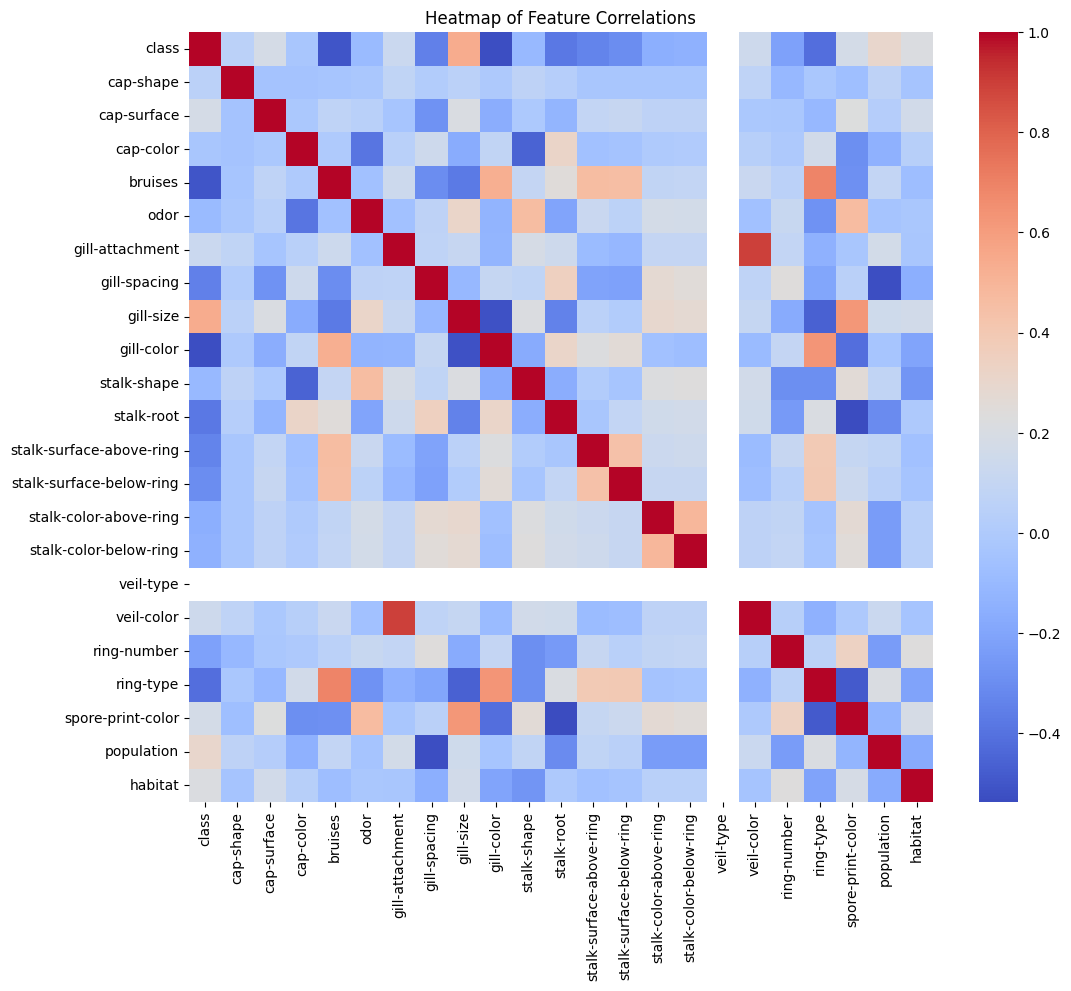

In [18]:

df_encoded = df.apply(LabelEncoder().fit_transform)

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap of Feature Correlations")
plt.show()


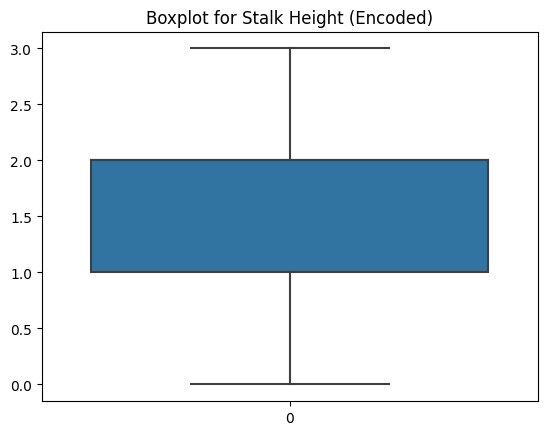

In [19]:
sns.boxplot(data=df_encoded['stalk-surface-above-ring'])
plt.title("Boxplot for Stalk Height (Encoded)")
plt.show()


In [20]:
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_encoded < (Q1 - 1.5 * IQR)) | (df_encoded > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Count of outliers per feature


class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment              210
gill-spacing                1312
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1312
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring      1588
stalk-color-below-ring      1652
veil-type                      0
veil-color                   200
ring-number                  636
ring-type                      0
spore-print-color              0
population                   724
habitat                      192
dtype: int64


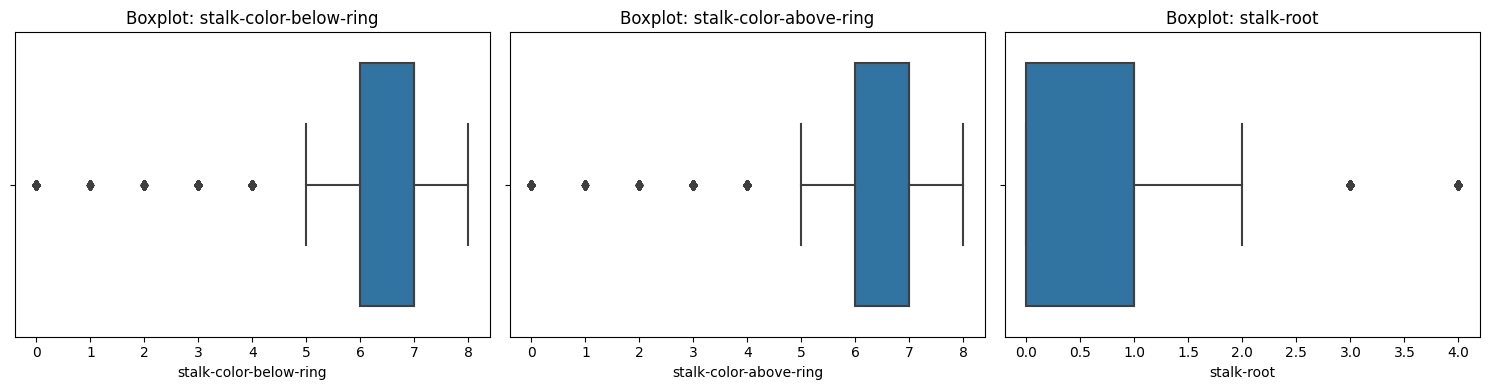

In [21]:
outlier_counts = outliers.sum().sort_values(ascending=False)
top_outlier_cols = outlier_counts[outlier_counts > 0].index[:3]  # top 3
plt.figure(figsize=(15, 4))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

# **Split Data into Train and Test**
- X ==> all features
- y ==> target column
- Split the dataset into training and testing sets.
- Ensure that the test set is representative of the real-world data.

In [23]:
x = df_encoded.drop('class', axis=1)
y = df_encoded['class']
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
outliers = (x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))
x_clean = x[~outliers.any(axis=1)]
y_clean = y[~outliers.any(axis=1)]
print("the data is split into x and y") 
x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)
print("the data is split into training ")
 


the data is split into x and y
the data is split into training 


In [24]:
print("shape of x training",x_train.shape)  
print("shape of y training",y_train.shape)
print("shape of x testing",x_test.shape)
print("shape of y testing",y_test.shape)


shape of x training (2880, 22)
shape of y training (2880,)
shape of x testing (720, 22)
shape of y testing (720,)


In [25]:
chi_scores, p_values = chi2(x_clean, y_clean)
feature_importance = pd.DataFrame({
    'Feature': x_clean.columns,
    'Chi2_Score': chi_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print(feature_importance)

                     Feature   Chi2_Score        P_Value
8                 gill-color  7097.189712   0.000000e+00
18                 ring-type  4116.900021   0.000000e+00
19         spore-print-color  1943.608264   0.000000e+00
10                stalk-root  1622.659029   0.000000e+00
3                    bruises  1348.371897  3.479176e-295
7                  gill-size   956.678403  4.688442e-210
21                   habitat   825.407402  1.614884e-181
2                  cap-color   714.996251  1.639531e-157
4                       odor   240.087305   3.764169e-54
11  stalk-surface-above-ring   170.879363   4.754531e-39
12  stalk-surface-below-ring   124.942217   5.239849e-29
9                stalk-shape   103.486615   2.621593e-24
1                cap-surface    50.935233   9.546452e-13
0                  cap-shape    25.118268   5.391962e-07
20                population    10.326308   1.311473e-03
13    stalk-color-above-ring     3.025314   8.197443e-02
14    stalk-color-below-ring   

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# **Model Selection**
-  The process of choosing a suitable model for a given problem. This involves selecting the right model based on the characteristics of the data, the problem at hand, and the desired performance metrics.
- Choose a suitable machine learning model for the mushroom classification problem.


## ***Rondom Forest Model***
-  model is a type of model that simulates the growth and development of a forest ecosystem. It can be used to study the effects of different management practices, such as thinning and harvesting, on the forest ecosystem.


In [26]:
rf_model = RandomForestClassifier(random_state=42)


## ***Decision Tree Model***
-  A decision tree model is a type of supervised learning algorithm that uses a tree algorithm to classify data. It works by recursively partitioning the data into smaller subsets based on the most informative features and making predictions based on the majority class in each subset.

In [27]:
D_tree_model = DecisionTreeClassifier(random_state=42)


## **Logistic Regression**
- Logistic regression is a type of regression analysis used to predict the outcome of a categorical dependent variable based on one or more predictor variables. It is a widely used statistical method in machine learning and data analysis.

In [28]:
logreg=LogisticRegression()

# **Model Training and Fitting**
- Train the selected model on the cleaned and preprocessed data.

## Random Forest Model

In [29]:
print("training the random forest model ....")
start_rf = time.time()
rf_model.fit(x_train, y_train)
end_rf = time.time()
print("done training the random forest model in : ", end_rf - start_rf, " seconds")

training the random forest model ....
done training the random forest model in :  0.2034764289855957  seconds


In [30]:
print("predict the random forest model...")

y_pred_rf = rf_model.predict(x_test)

print("done predict the random forest model")

predict the random forest model...
done predict the random forest model


## Decision Tree Model

In [31]:
print("training the Decision Tree model ....")
start_D_tree = time.time()
D_tree_model.fit(x_train, y_train)
end_D_tree = time.time()
print("done training the Decision Tree model in : ", end_D_tree - start_D_tree, " seconds")

training the Decision Tree model ....
done training the Decision Tree model in :  0.005641937255859375  seconds


In [32]:
print("predict the Decision Tree model...")

y_pred_D_tree = D_tree_model.predict(x_test)

print("done predict the Decision Tree model")

predict the Decision Tree model...
done predict the Decision Tree model


## Logistic Regression

In [33]:
print("training the logreg model ....")
start_logreg = time.time()
logreg.fit(x_train, y_train)
end_logreg = time.time()
print("done training the logreg model in : ", end_logreg - start_logreg, " seconds")

training the logreg model ....
done training the logreg model in :  0.04934120178222656  seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print("predict the Logistic model...")

y_pred_logreg = logreg.predict(x_test)

print("done predict the Logistic model")

predict the Logistic model...
done predict the Logistic model


# **Model Tuning & Optimization**
- Fine-tune the model's hyperparameters to improve performance.
- Use techniques like cross-validation and grid search to find the best hyperparameter values.

## Random forest model

In [35]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # optional, useful for distance-based models
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),  
    ('classifier', RandomForestClassifier(random_state=42))
])


param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [3, 5, 10],
    'classifier__max_features': ['sqrt']
}

# GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

In [36]:

print("training Tune the random forest model ....")
start_rf = time.time()

grid_search_rf.fit(x_train, y_train)

end_rf = time.time()
print("done training Tune the random forest model in : ", end_rf - start_rf, " seconds")




training Tune the random forest model ....
done training Tune the random forest model in :  15.07752513885498  seconds


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 5  6 15 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [37]:
best_model_rf = grid_search_rf.best_estimator_
print("predict Tune the random forest model...")

y_pred_rf_best = best_model_rf.predict(x_test)

print("done predict Tune the random forest model")

predict Tune the random forest model...
done predict Tune the random forest model


In [38]:
scores_rf = cross_val_score(best_model_rf, x, y, cv=5)
print("CV Accuracy Scores:", scores_rf)
print("Mean CV Accuracy:", np.mean(scores_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/

CV Accuracy Scores: [0.78830769 0.992      0.81230769 1.         0.55849754]
Mean CV Accuracy: 0.8302225843122395


Best Parameters: {'classifier__max_depth': 3, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       433

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



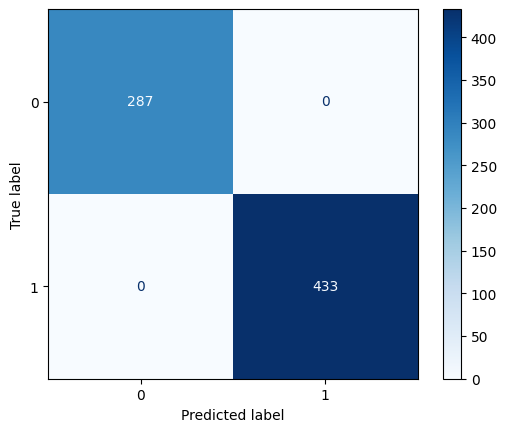

In [39]:
print("Best Parameters:", grid_search_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

## Decision Tree Model

In [40]:
param_grid_D_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search_D_tree = GridSearchCV(D_tree_model, param_grid_D_tree, cv=5, scoring='accuracy')



In [41]:
print("training Tune the Decision Tree model ....")
start_D_tree = time.time()
grid_search_D_tree.fit(x_train, y_train)
end_D_tree = time.time()
print("done training tune the Decision Tree model in : ", end_D_tree - start_D_tree, " seconds")

training Tune the Decision Tree model ....
done training tune the Decision Tree model in :  0.7914919853210449  seconds


In [42]:

print("Best Parameters:", grid_search_D_tree.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [43]:
best_tree = grid_search_D_tree.best_estimator_

print("predict Tune the Decision Tree model...")

y_pred_D_tree_best = best_tree.predict(x_test)

print("done predict Tune the Decision Tree model")

predict Tune the Decision Tree model...
done predict Tune the Decision Tree model


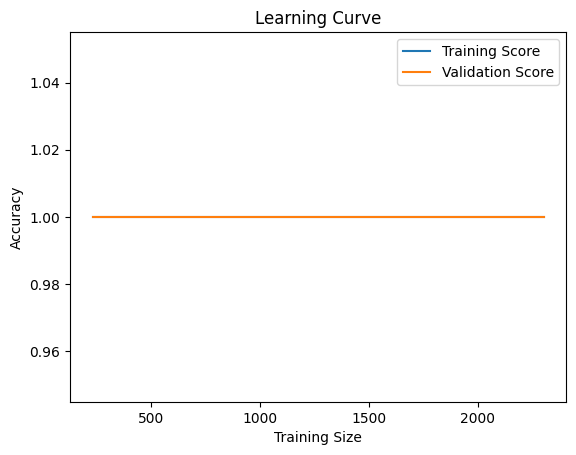

In [44]:
train_sizes, train_scores, test_scores = learning_curve(
    best_tree, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


# **Model Evaluation**
- Evaluate the performance of the trained model on the test data.
- Calculate metrics such as accuracy, precision, recall, and F1 score.
- Determine the model's ability to make accurate predictions on new, unseen data.

## Rondom forest model

In [45]:
accuracy_rf = accuracy_score(y_test, y_pred_rf_best)
precision_rf = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf_best, average='weighted')

classification_rep_rf = classification_report(y_test, y_pred_rf_best)

In [46]:
print(classification_rep_rf)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       433

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [47]:
metrics_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})

print(metrics_rf)

      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


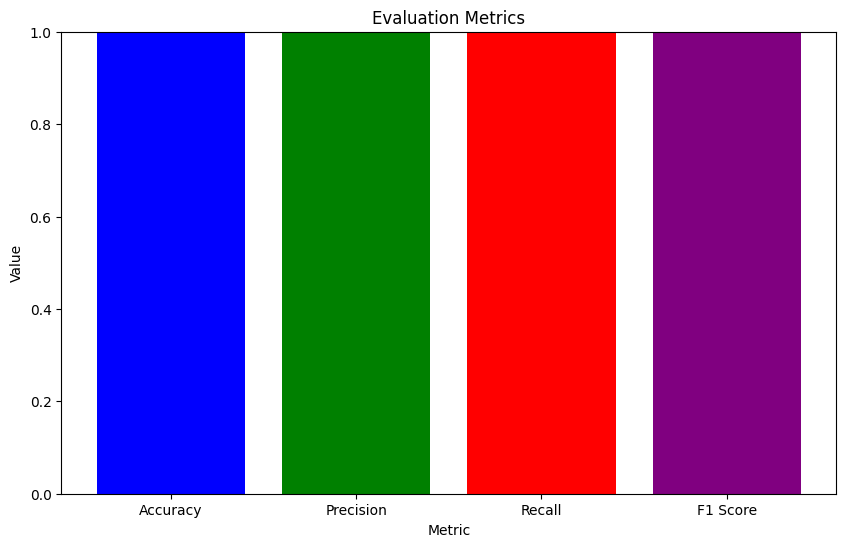

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(metrics_rf['Metric'], metrics_rf['Value'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Metrics values typically range between 0 and 1
plt.show()

Train Confusion Matrix rondom forest:
[[287   0]
 [  0 433]]


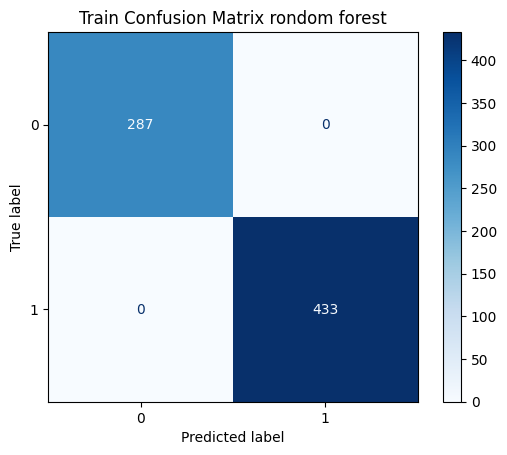

In [49]:
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print("Train Confusion Matrix rondom forest:")
print(cm_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=rf_model.classes_).plot(cmap="Blues")
plt.title("Train Confusion Matrix rondom forest")
plt.show()


## Decision Tree Model

In [50]:
accuracy_D_tree = accuracy_score(y_test, y_pred_D_tree_best)
precision_D_tree = precision_score(y_test, y_pred_D_tree_best, average='weighted')
recall_D_tree = recall_score(y_test, y_pred_D_tree_best, average='weighted')
f1_D_tree = f1_score(y_test, y_pred_D_tree_best, average='weighted')

classification_rep_D_tree = classification_report(y_test, y_pred_D_tree_best)

In [51]:
print("classification_report for Decision tree" , classification_rep_D_tree)


classification_report for Decision tree               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       433

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [52]:
metrics_D_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_D_tree, precision_D_tree, recall_D_tree, f1_D_tree]
})

print(metrics_D_tree)


      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


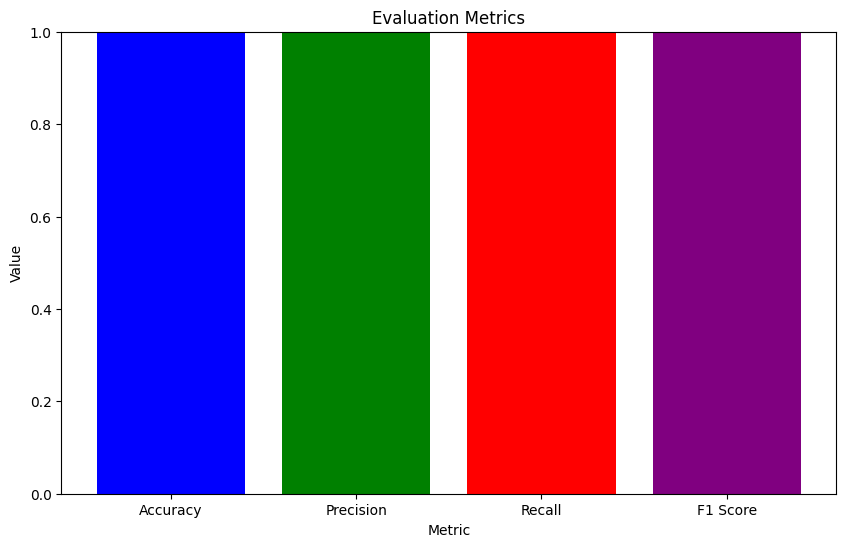

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(metrics_D_tree['Metric'], metrics_D_tree['Value'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Metrics values typically range between 0 and 1
plt.show()

Train Confusion Matrix Decision Tree:
[[287   0]
 [  0 433]]


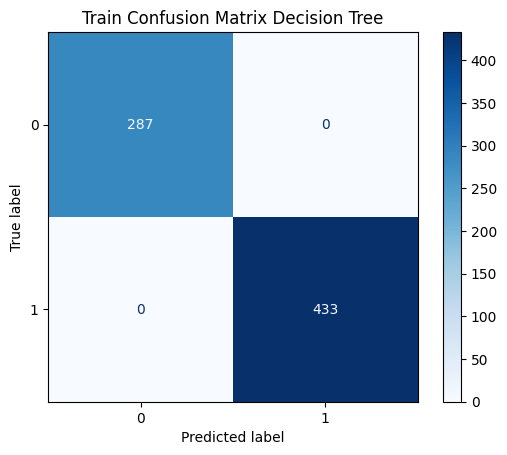

In [54]:
cm_D_tree = confusion_matrix(y_test, y_pred_D_tree_best)
print("Train Confusion Matrix Decision Tree:")
print(cm_D_tree)
ConfusionMatrixDisplay(cm_D_tree, display_labels=D_tree_model.classes_).plot(cmap="Blues")
plt.title("Train Confusion Matrix Decision Tree")
plt.show()

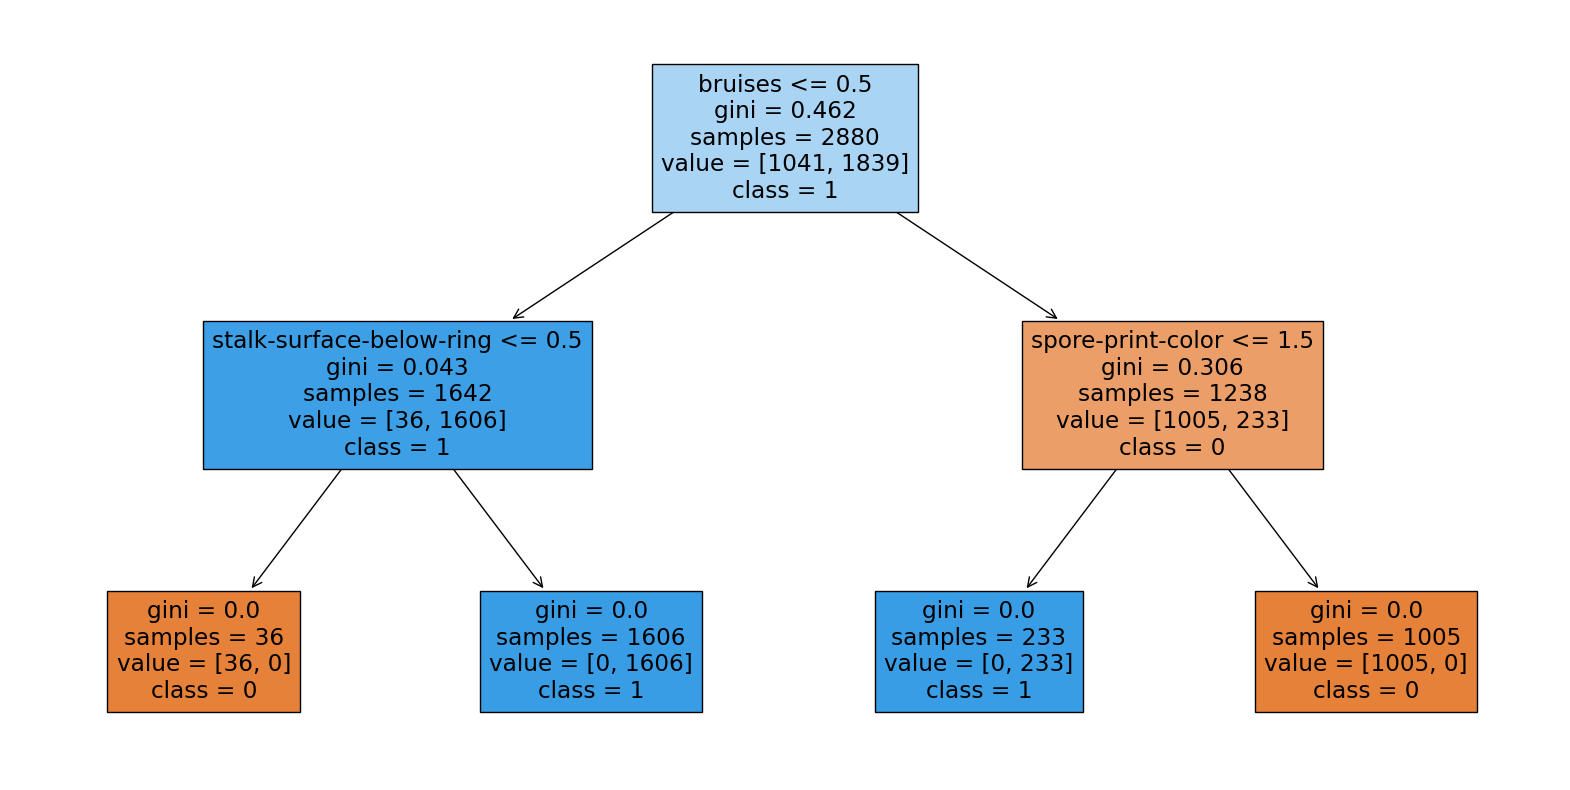

In [55]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=x_clean.columns, class_names=['0', '1'])
plt.show()

## Logistic Regression


In [56]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

classification_rep_logreg = classification_report(y_test, y_pred_logreg)

In [57]:
print(classification_rep_logreg)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       433

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [58]:
metrics_logreg = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]
})

print(metrics_logreg)

      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


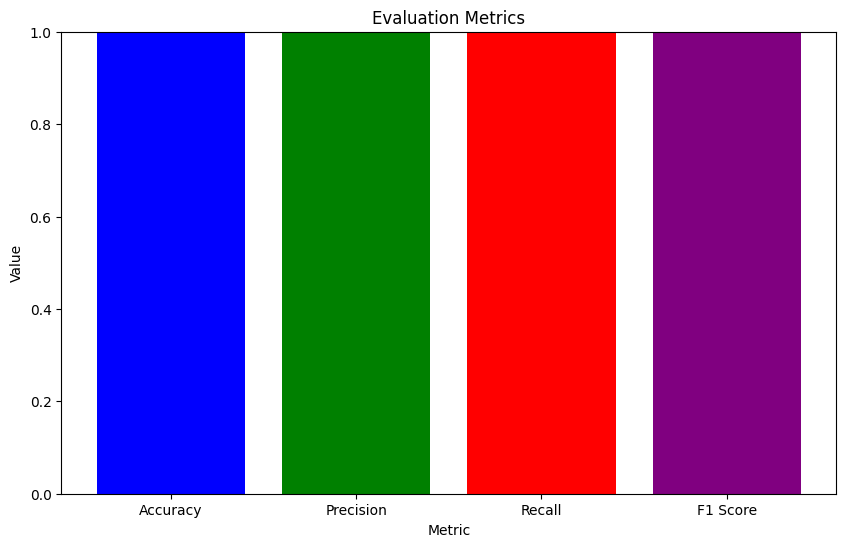

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(metrics_logreg['Metric'], metrics_logreg['Value'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Metrics values typically range between 0 and 1
plt.show()

Train Confusion Matrix rondom forest:
[[287   0]
 [  0 433]]


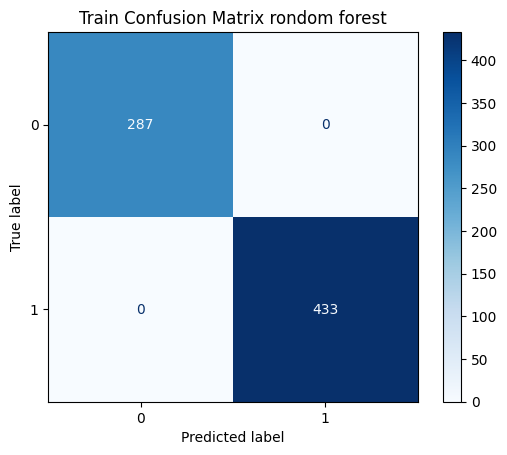

In [60]:
cm_logreg= confusion_matrix(y_test, y_pred_logreg)
print("Train Confusion Matrix rondom forest:")
print(cm_logreg)
ConfusionMatrixDisplay(cm_logreg, display_labels=logreg.classes_).plot(cmap="Blues")
plt.title("Train Confusion Matrix rondom forest")
plt.show()


#

**conclusion**
- RandomForestClassifier is able to classify mushrooms more accuractely than MultinomialNB.
- Achieved a ROC AUC Score of 1.0 without cross-validation or hyperparameter tuning.
- odor and gill-size has the highest importance.

---

<div style="text-align: center;">
  <p>Thank you for your time and efforts!</p>
  <h3>By: Youssef Bassiony Abdlah</h3>
  <div style="display: inline-block;">
    <a href="youssefbassiony113@gmail.com" title="Redirect to e-mail">
      <img src="https://img.icons8.com/?size=100&id=aZirgpcZkzvm&format=png&color=000000"  alt="e-mail" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://wa.me/+201001725166/" title="Redirect to What'sApp">
      <img src="https://img.icons8.com/?size=96&id=7OeRNqg6S7Vf&format=gif" alt="What'sApp" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://www.linkedin.com/in/youssef-bassiony/" title="Redirect to LinkedIn">
      <img src="https://img.icons8.com/?size=100&id=xuvGCOXi8Wyg&format=png&color=000000" alt="LinkedIn" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
  </div>
</div>
